
# Random Forest Project 

For this project I explored publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). As investors would want to invest in people who showed a profile of having a high probability of paying them back.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

Using lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. Data from [here](https://www.lendingclub.com/info/download-data.action).

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [4]:
loans = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

Data visualization using seaborn and pandas built-in plotting capabilities. 

** Histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**


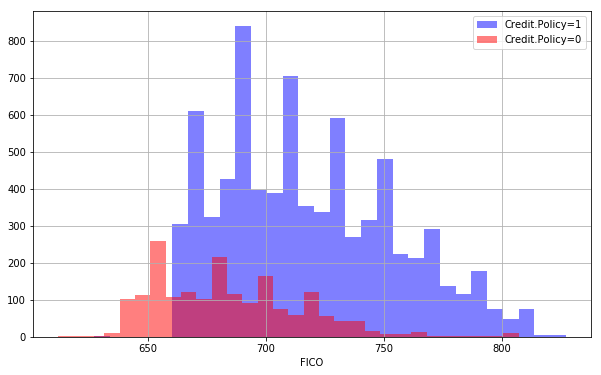

In [57]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy'] == 1]['fico'].hist(alpha=0.5,bins=30, color='blue', label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,bins=30,color='red', label='Credit.Policy=0')
plt.xlabel('FICO')
plt.legend()

** Histogram of two FICO distributions by the not.fully.paid column.**

Text(0.5, 0, 'FICO')

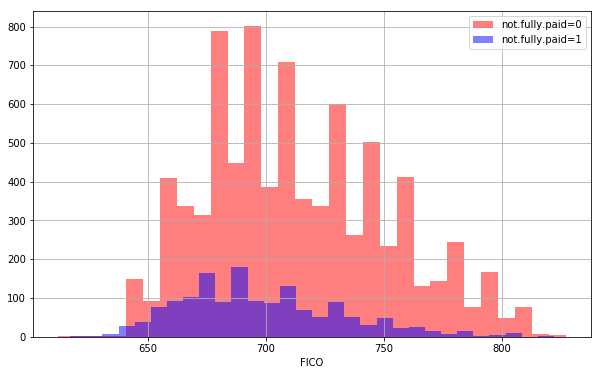

In [67]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
plt.legend()
plt.xlabel('FICO')

** Countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

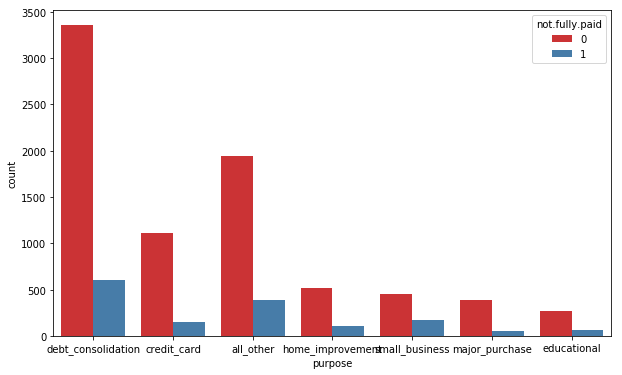

In [72]:
plt.figure(figsize=(10,6))
sns.countplot(data=loans, x='purpose', hue='not.fully.paid', palette='Set1')

** Visualization of trend between FICO score and interest rate using jointplot.**

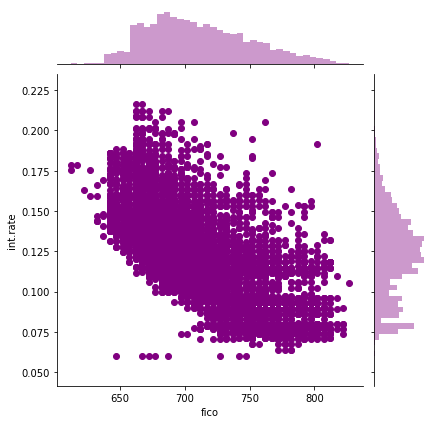

In [73]:
sns.jointplot(x='fico', y='int.rate', data=loans, color='purple')

** Regression lmplots to see if the trend differed between not.fully.paid and credit.policy. **

<Figure size 792x504 with 0 Axes>

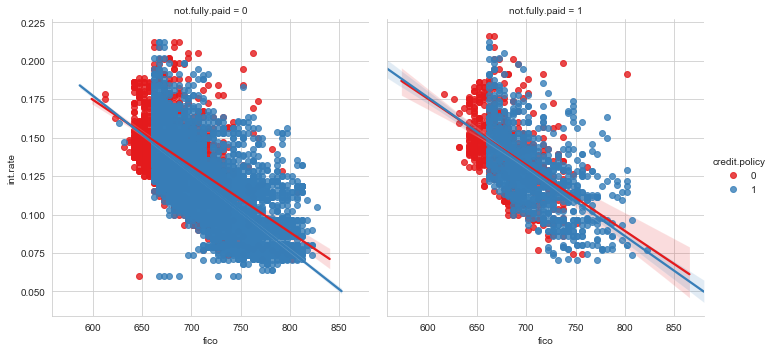

In [84]:
plt.figure(figsize=(11,7))
sns.set_style('whitegrid')
sns.lmplot(x='fico',y='int.rate',data=loans,hue='credit.policy',col='not.fully.paid',palette='Set1')


# Setting up the Data

Before creating the Random Forest Classification Model, need to clean and set up the data for the model.

**Checking loans.info() again.**

In [89]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Because the **purpose** column is categorical. I needed to transform the purpose column using dummy variables coding (0, 1) so sklearn will be able to understand them. 

**Created a list of 1 element containing the string 'purpose' named cat_feats.**

In [95]:
cat_feats=['purpose']
cat_feats

['purpose']

**Using pd.get_dummies to create a fixed larger dataframe that has new feature columns with dummy variables. Then Setting this dataframe as final_data.**

In [96]:
final_data = pd.get_dummies(data=loans, columns=cat_feats, drop_first=True)

In [98]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

## Train Test Split

Split our data into a training set and a testing set using sklearn.


In [111]:
from sklearn.model_selection import train_test_split

In [116]:
y=final_data['not.fully.paid']
X=final_data.drop('not.fully.paid',axis=1)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

Single decision tree model

** Import DecisionTreeClassifier**

In [118]:
from sklearn.tree import DecisionTreeClassifier

**Creating an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [119]:
dtree= DecisionTreeClassifier()

In [120]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation of Decision Tree
**Compare predictions to the test set to measure model accuracy using the sklearn classification report and a confusion matrix.**

In [122]:
dtreepred = dtree.predict(X_test)

In [123]:
from sklearn.metrics import classification_report, confusion_matrix

In [125]:
print(classification_report(y_test, dtreepred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.19      0.24      0.21       443

   micro avg       0.73      0.73      0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [126]:
print(confusion_matrix(y_test, dtreepred))

[[1997  434]
 [ 338  105]]


## Training the Random Forest model

**Creating an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
forest=RandomForestClassifier()

In [132]:
forest.fit(X_train, y_train)

/Users/sarac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation of Random Forest

Compare predictions of random forest model results to test sets.


In [133]:
forestpred = forest.predict(X_test)

**Classification report from the results.**

In [134]:
print(classification_report(y_test, forestpred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2431
           1       0.27      0.05      0.08       443

   micro avg       0.83      0.83      0.83      2874
   macro avg       0.56      0.51      0.49      2874
weighted avg       0.76      0.83      0.78      2874



**Show the Confusion Matrix for the predictions.**

In [135]:
print(confusion_matrix(y_test, forestpred))

[[2374   57]
 [ 422   21]]


**Performance of random forest versus the decision tree:**

In [5]:
# Random Forest performed Slightly Better than Decision Tree

# Completed Project